In [1]:
#Packages related to data importing, manipulation, exploratory data analysis, data understanding
import numpy as np
import pandas as pd
import pandas_profiling
import scipy.stats as stats

#Packages related to data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot


#Modules related to split the data & gridsearch
from sklearn.model_selection import train_test_split, GridSearchCV

#Module related to calculation of metrics
from sklearn import metrics


#Modules related key techniques of supervised learning 
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

#Modules  to scaling the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler,normalize
from sklearn import preprocessing

#pip install tk  #GUI backend

In [2]:
#importing data
Credit=pd.read_excel('CreditConsumptionData.xlsx')
Behavior=pd.read_excel('CustomerBehaviorData.xlsx')
Demographics=pd.read_excel('CustomerDemographics.xlsx')

In [3]:
#merging data
Customer=Credit.merge(Behavior.merge(Demographics,on='ID'),on='ID')

In [4]:
#Customer[Customer.duplicated()] 
#Customer.isnull().sum()
#Customer.describe()
#Customer.info()
#Customer.shape
#Customer

In [5]:
# dataset(target-null value) segregation
Customer_existing_cc_cons = Customer[Customer.cc_cons.isnull()==0]
Customer_missing_cc_cons = Customer[Customer.cc_cons.isnull()==1]

In [6]:
#Customer_existing_cc_cons.info()
#Customer_existing_cc_cons.isnull().sum()

In [7]:
# Column segregation
Bincol=['account_type','gender','loan_enq']
Ordcol=['Income']
Numcol=list(set(Customer_existing_cc_cons.columns).difference(set(Bincol).union(set(Ordcol))).difference(['cc_cons']))

In [8]:
# Dummy encoding 
#Nomcol
#new_Customer_existing=pd.get_dummies(Customer_existing_cc_cons, columns =Bincol)
#Ordcol
'''
# Create Y Multinomial variable
dim={'LOW':0,'MEDIUM':1, 'HIGH':2}
new_Customer_existing['Income']=new_Customer_existing['Income'].map(dim)
'''
#one_hot_encoding
new_Customer_existing=pd.get_dummies(Customer_existing_cc_cons, columns = ['Income','account_type','gender','loan_enq'])

In [9]:
new_Customer_existing.shape
#new_Customer_existing.std()

(15000, 53)

In [10]:
###zero-deviation columns droping :
#below columns have no deviation from the average
new_Customer_existing.std()==0
#droping columns
new_Customer_existing = new_Customer_existing.drop(new_Customer_existing.columns[new_Customer_existing.nunique() == 1],axis=1)

In [11]:
new_Customer_existing.columns[new_Customer_existing.isnull().sum()>0]

Index(['cc_count_apr', 'investment_3', 'debit_count_apr', 'emi_active',
       'Avg_days_between_transaction'],
      dtype='object')

In [12]:
#missing value clumns:
#new_Customer_existing.columns[new_Customer_existing.isnull().sum()>0]

#missing value treatment
#new_Customer_existing=new_Customer_existing.fillna(np.median)
new_Customer_existing=new_Customer_existing.dropna()
#droping id
new_Customer_existing=new_Customer_existing.drop(columns=['ID'])

In [13]:
#Below are some of the techniques of detecting outliers
#1.Boxplots
'''
sns.boxplot(new_Customer_existing.cc_cons)
plt.show()
'''
#2.Z-score
'''
outlier = []
def detect_outliers_zscore(data):
    threshold = 3
    mean=np.mean(data)
    std=np.std(data)
    for i in data:
        z = (i-mean)/std
        if z > threshold:
                outlier.append(i)
    return outlier
    
for i in new_Customer_existing.columns:
    l=len(detect_outliers_zscore(new_Customer_existing[i]))
    print(i,":",l)
'''


#3.Inter Quantile Range(IQR)
#create a function to find outliers using IQR
def find_outliers_IQR(df):
   q1=df.quantile(0.25)     
   q3=df.quantile(0.75)      
   IQR=q3-q1                 
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))] 
   return outliers
#find_outliers_IQR_count=find_outliers_IQR(new_Customer_existing.cc_cons).count()

#finding outlier except binary value column:['gender_F','gender_M','loan_enq_Y','account_type_saving','account_type_current','Income_HIGH', 'Income_LOW','Income_MEDIUM','NetBanking_Flag']
for i in new_Customer_existing[new_Customer_existing.columns.difference(['gender_F','gender_M','loan_enq_Y','account_type_saving','account_type_current','Income_HIGH', 'Income_LOW','Income_MEDIUM','NetBanking_Flag'])]:
    print("total outlier count for-",i,':',find_outliers_IQR(new_Customer_existing[i]).count())
print("Target(cc_cons)",':',find_outliers_IQR(new_Customer_existing.cc_cons).count())
#print('total',find_outliers_IQR_count/new_Customer_existing.cc_cons.count()*100,'% data outlier from Target variable')

total outlier count for- Avg_days_between_transaction : 0
total outlier count for- Emp_Tenure_Years : 919
total outlier count for- Tenure_with_Bank : 0
total outlier count for- age : 534
total outlier count for- card_lim : 59
total outlier count for- cc_cons : 3133
total outlier count for- cc_cons_apr : 1217
total outlier count for- cc_cons_jun : 1181
total outlier count for- cc_cons_may : 1202
total outlier count for- cc_count_apr : 883
total outlier count for- cc_count_jun : 49
total outlier count for- cc_count_may : 709
total outlier count for- credit_amount_apr : 1229
total outlier count for- credit_amount_jun : 1217
total outlier count for- credit_amount_may : 1173
total outlier count for- credit_count_apr : 58
total outlier count for- credit_count_jun : 2216
total outlier count for- credit_count_may : 2655
total outlier count for- dc_cons_apr : 1220
total outlier count for- dc_cons_jun : 1366
total outlier count for- dc_cons_may : 1248
total outlier count for- dc_count_apr : 434


C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


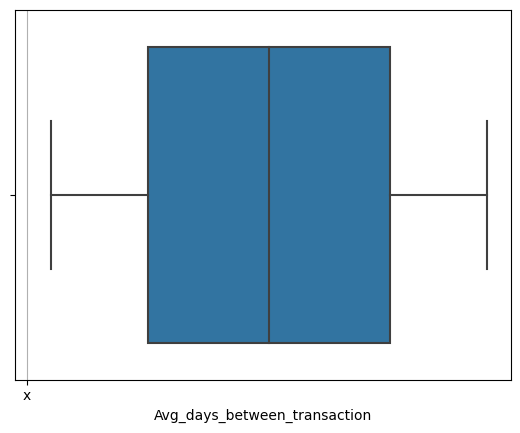

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


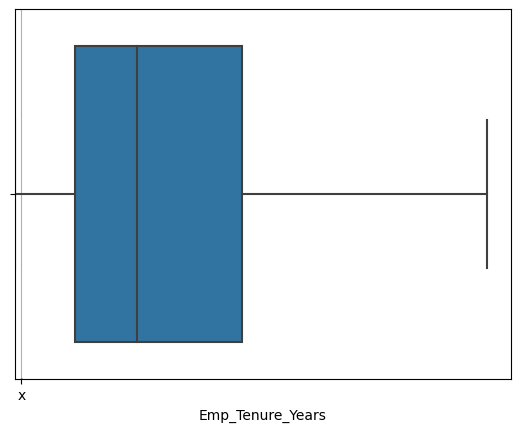

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


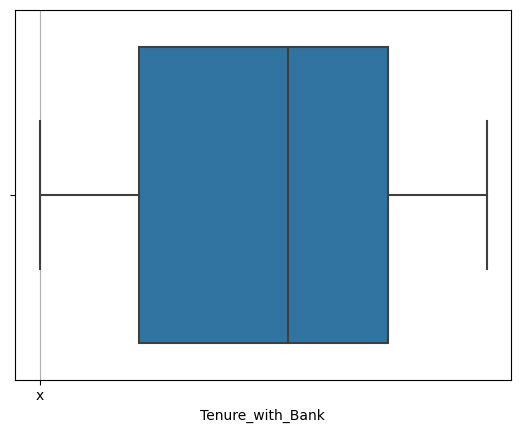

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


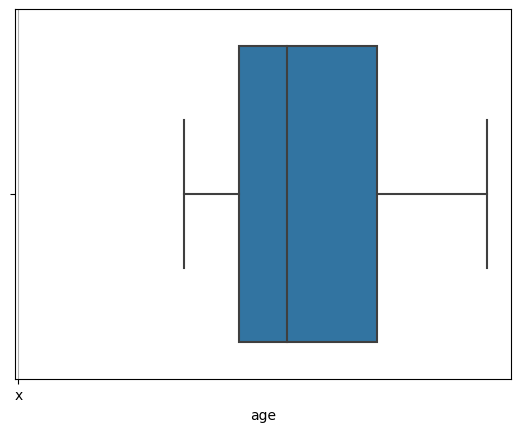

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


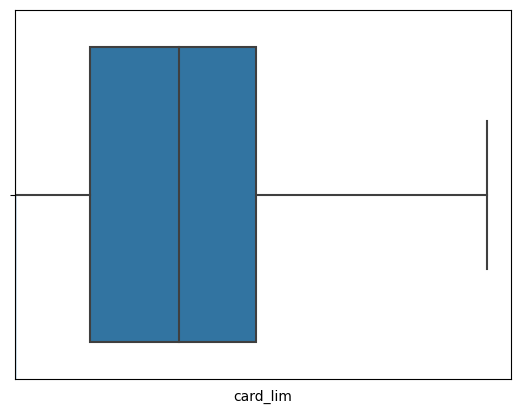

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


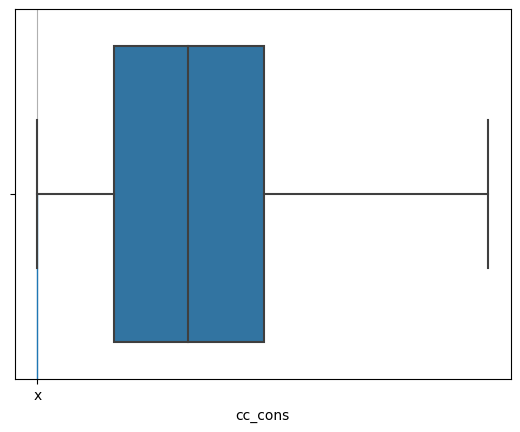

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


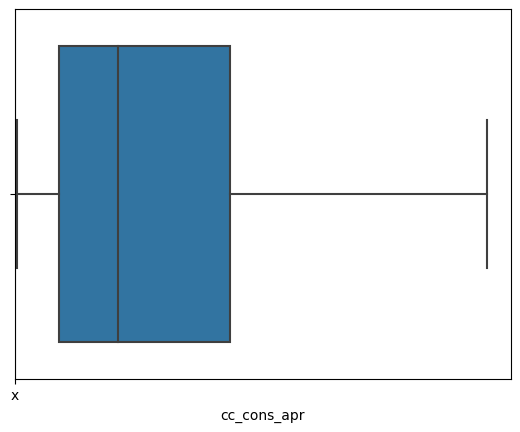

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


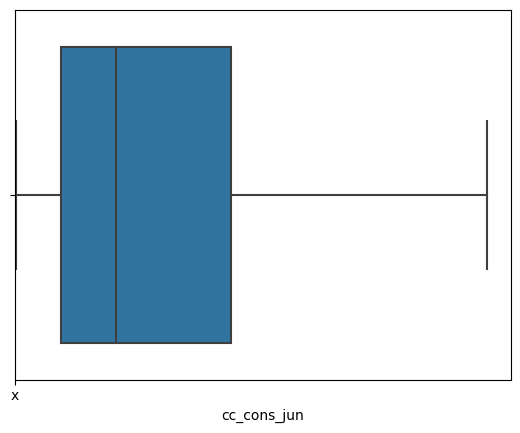

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


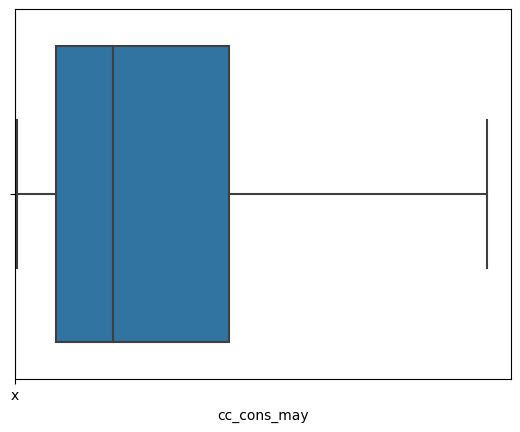

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


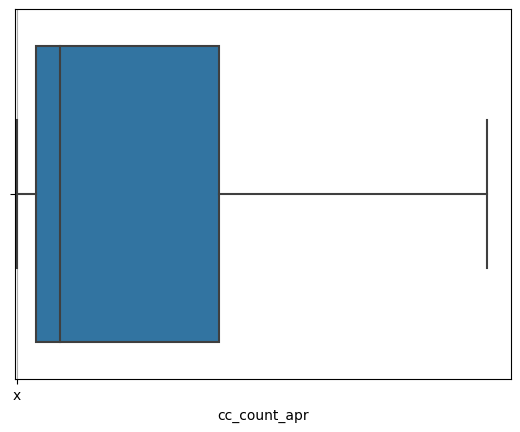

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


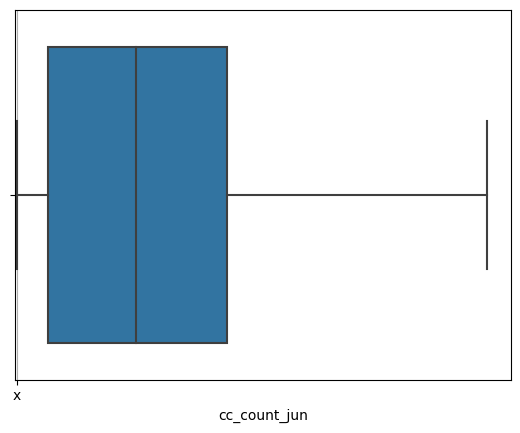

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


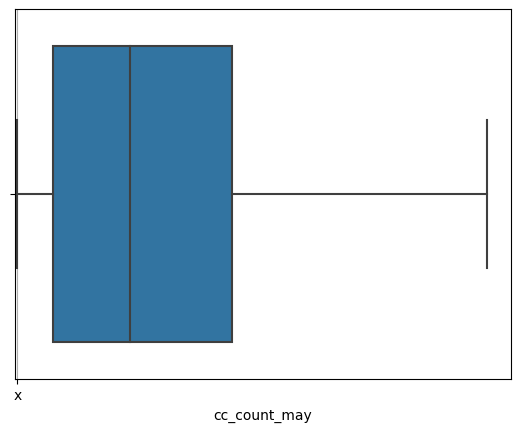

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


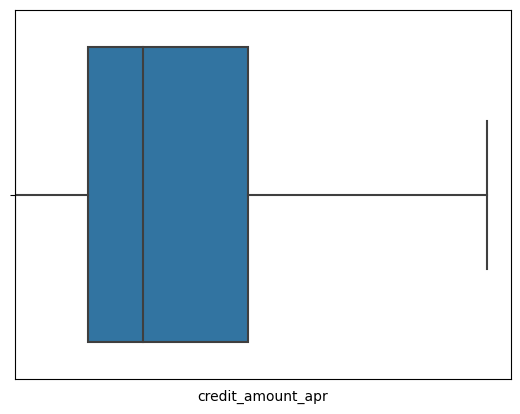

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


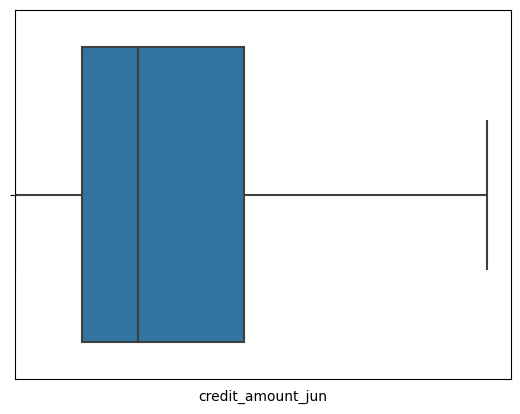

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


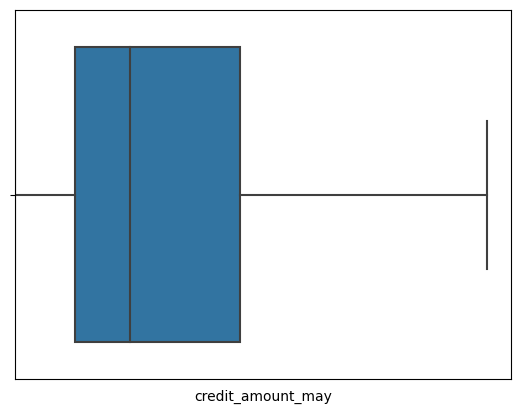

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


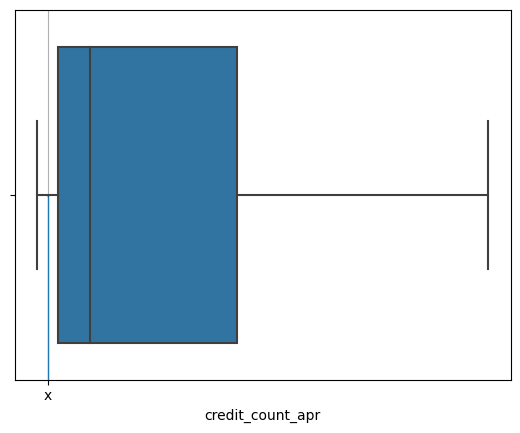

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


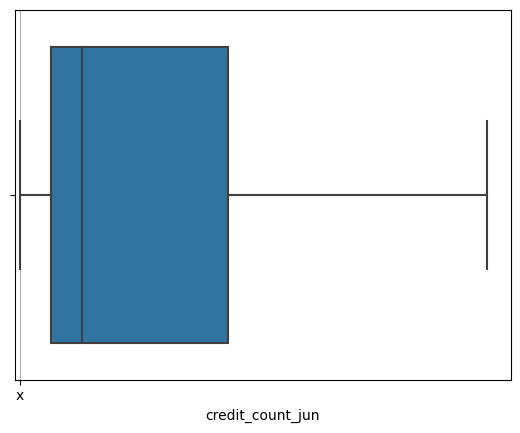

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


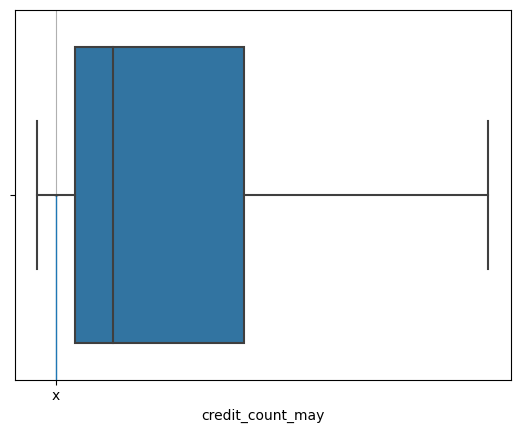

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


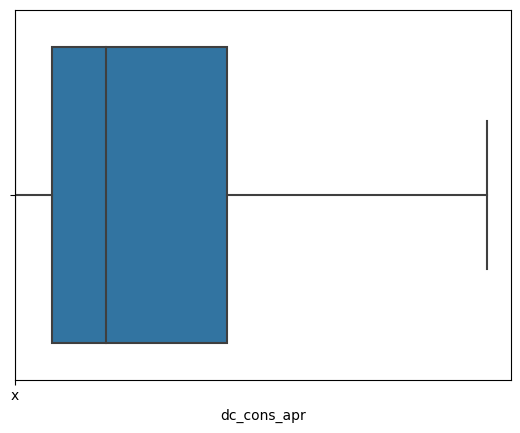

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


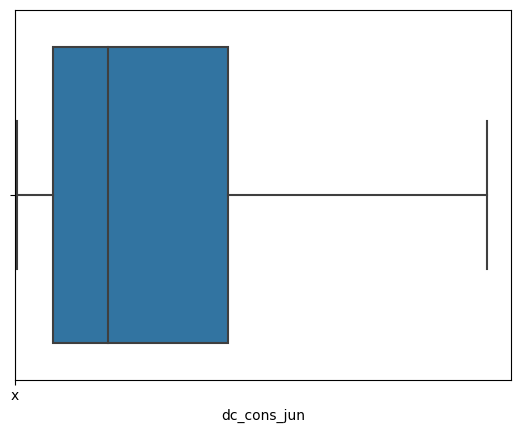

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


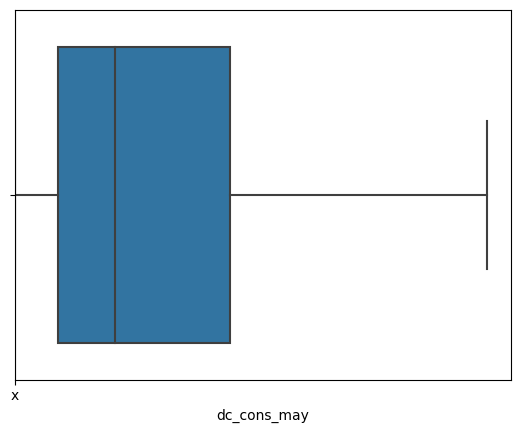

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


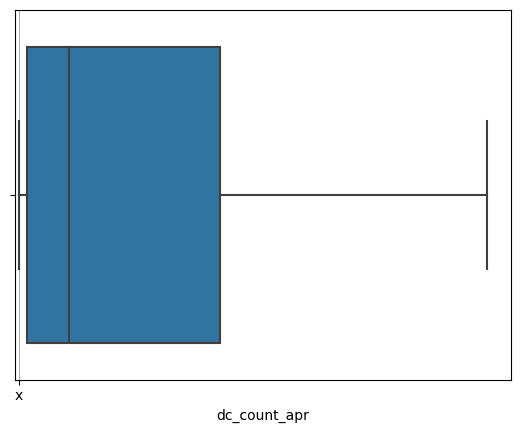

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


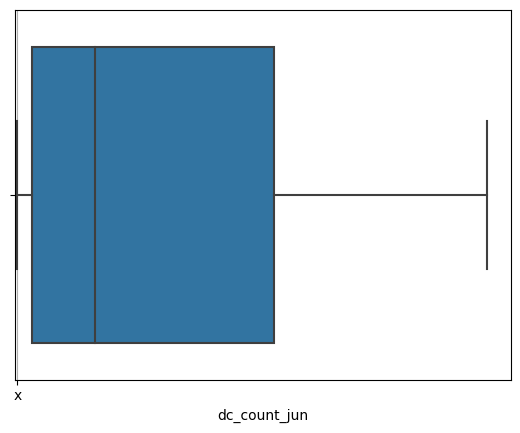

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


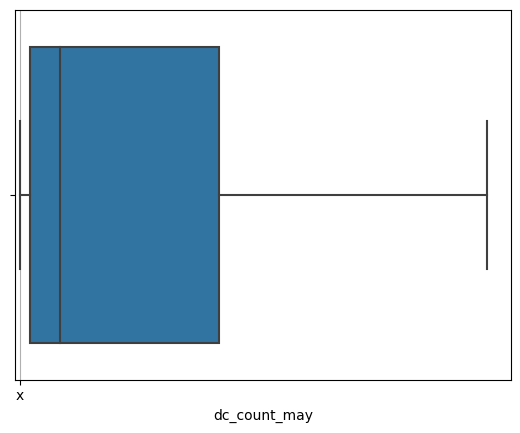

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


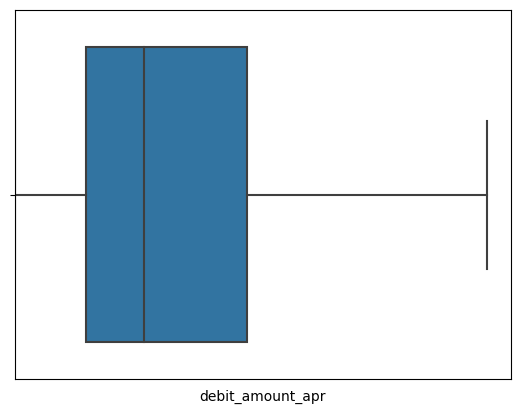

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


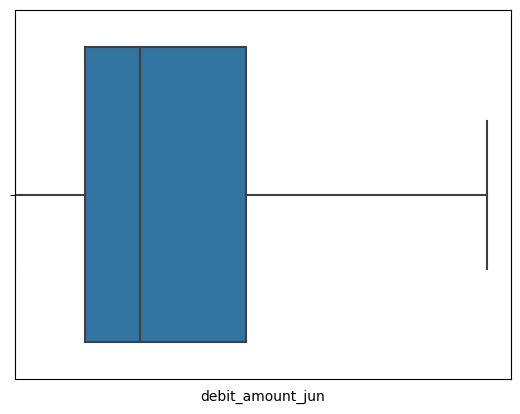

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


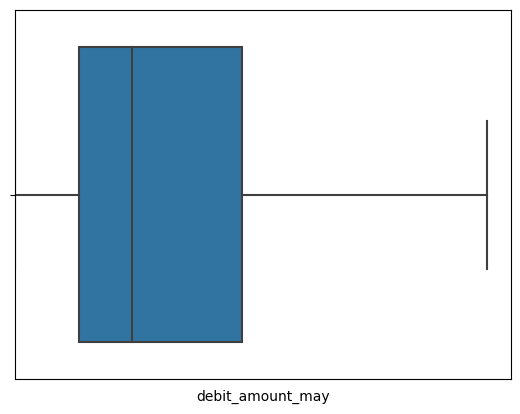

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


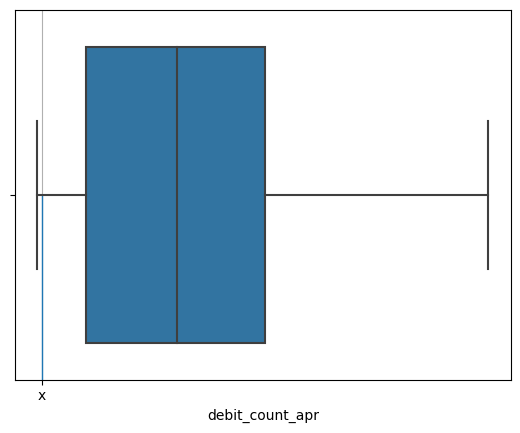

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


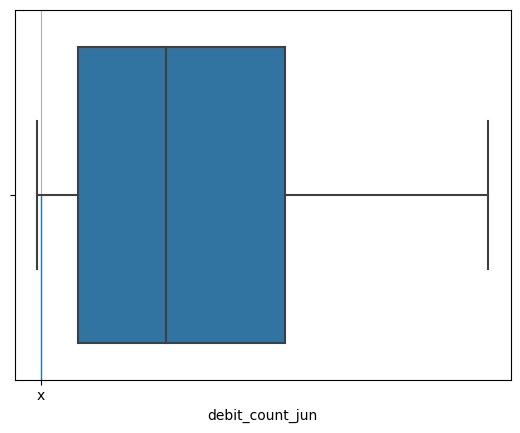

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


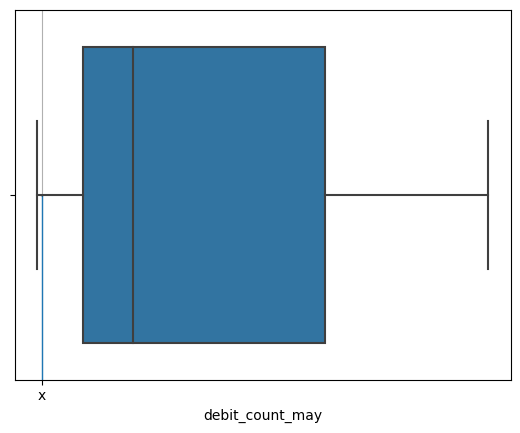

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


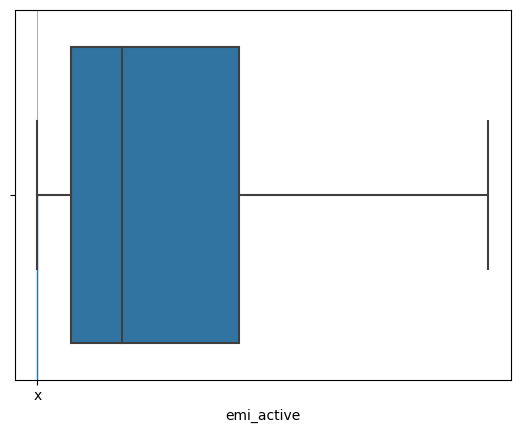

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


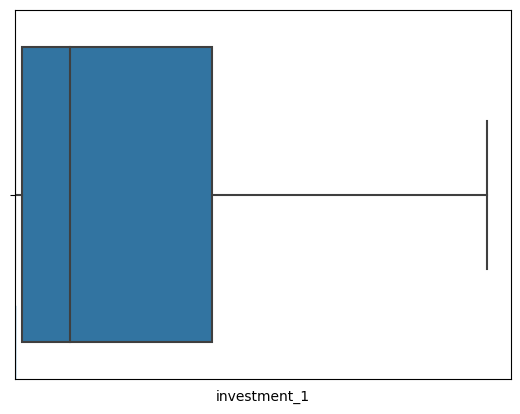

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


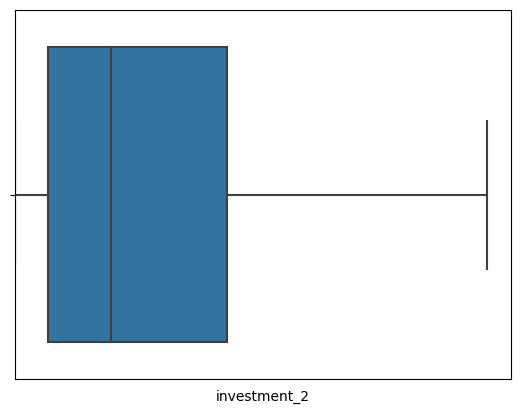

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


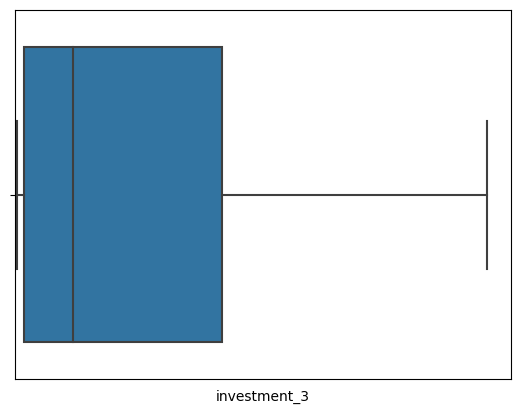

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


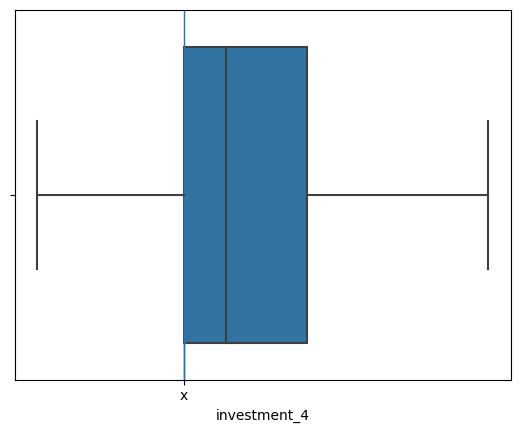

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


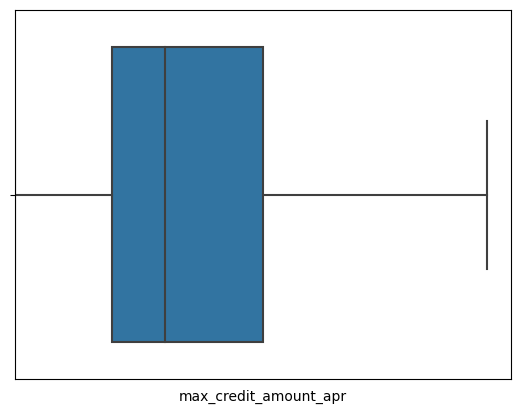

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


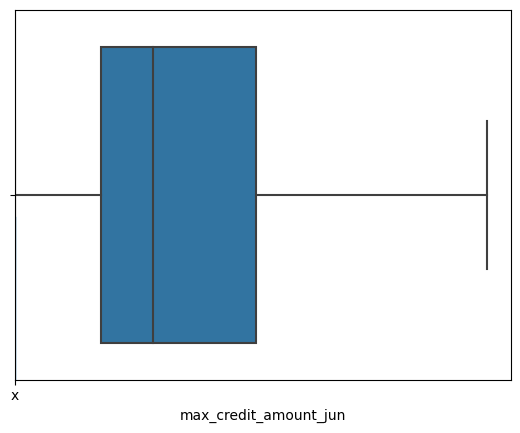

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


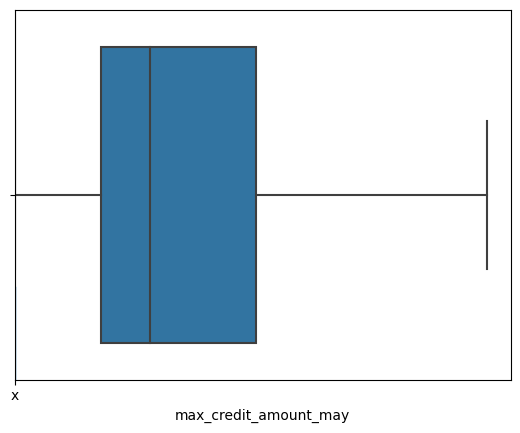

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


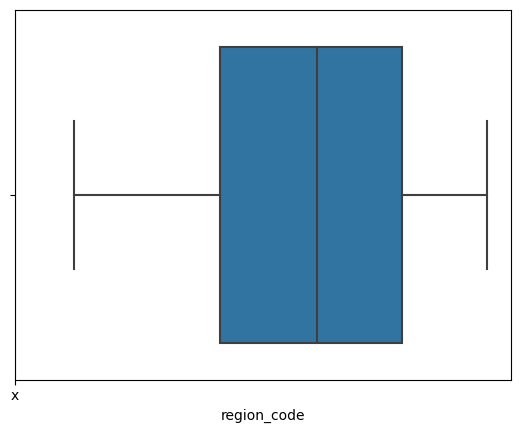

In [14]:
#Below are some of the methods of treating the outliers
#1)Trimming/removing the outlier
# Trimming
'''
for i in sample_outliers:
    a = np.delete(sample, np.where(sample==i))
print(a)
'''
# print(len(sample), len(a))
#2)Quantile based flooring and capping
'''
# Computing 10th, 90th percentiles and replacing the outliers
tenth_percentile = np.percentile(sample, 10)
ninetieth_percentile = np.percentile(sample, 90)
# print(tenth_percentile, ninetieth_percentile)b = np.where(sample<tenth_percentile, tenth_percentile, sample)
b = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
# print("Sample:", sample)
print("New array:",b)
'''

#3)Mean/Median imputation
'''
median = np.median(sample)# Replace with median
for i in sample_outliers:
    c = np.where(sample==i, 14, sample)
print("Sample: ", sample)
print("New array: ",c)
# print(x.dtype)
'''

#  treatment
for i in new_Customer_existing[new_Customer_existing.columns.difference(['gender_F','gender_M','loan_enq_Y','account_type_saving','account_type_current','Income_HIGH', 'Income_LOW','Income_MEDIUM','NetBanking_Flag'])]:
    _, bp = pd.DataFrame.boxplot(new_Customer_existing[i], return_type='both')
    whiskers = [whiskers.get_ydata() for whiskers in bp["whiskers"]]
    new_Customer_existing[i].clip(lower=whiskers[0][1],upper=whiskers[1][1],inplace=True)
    sns.boxplot(new_Customer_existing[i])
    plt.show()

In [15]:
new_Customer_existing.head()

,cc_cons,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,NetBanking_Flag,Avg_days_between_transaction,Income_HIGH,Income_LOW,Income_MEDIUM,account_type_current,account_type_saving,gender_F,gender_M,loan_enq_Y
0,20014.0,24893.00,378.00,10288.00,18033.70,16291.40,11432.00,2.0,26.0,10.0,...,0,17.0,0,0,1,1,0,0,1,1
1,10173.0,18941.62,966.00,20672.00,287.00,4217.00,885.00,1.0,7.0,13.0,...,0,14.0,1,0,0,1,0,0,1,1
2,16095.0,5678.87,2724.00,1964.50,3933.11,23956.25,5168.00,43.0,32.0,102.0,...,1,3.0,0,0,1,1,0,0,1,1
3,7707.0,30489.50,1236.00,12609.88,9138.14,17521.00,13650.30,53.0,1.0,50.0,...,1,4.0,0,0,1,1,0,1,0,1
4,40055.0,7441.40,6906.04,4364.00,1939.00,2121.00,6829.18,67.0,47.0,82.0,...,1,7.0,0,0,1,1,0,0,1,0


In [16]:
#assumption of a linear regression
#1)y(Target) should follow normal Distribution
#2)y&X should have linear relationship
#3)NO outliers
#4)NO missings
#5)NO Multicollinerity

In [17]:
#There are two ways to go about analyzing the non-normal data.
#Either use the non-parametric tests, which do not assume normality or
#transform the data using an appropriate function,forcing it to fit normal distribution.

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Statistics=0.837, p=0.000
Sample does not look Gaussian (reject H0)


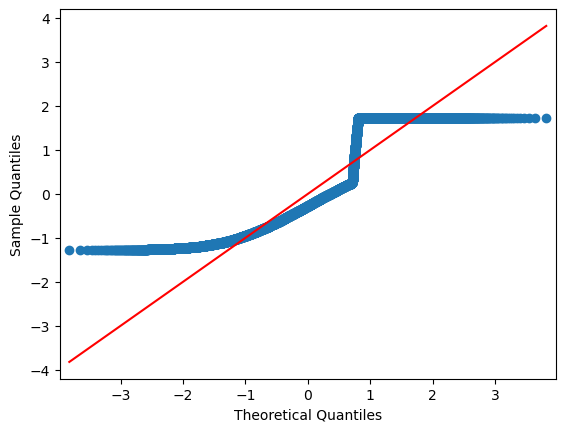

In [18]:
#Kolmogorov–Smirnov test and the Shapiro–Wilk test are most widely used methods to test the normality of the data.
# Shapiro-Wilk Test to check normality 
stat, p = stats.shapiro(new_Customer_existing.cc_cons)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

# normality test
    '''    
stat, p = stats.normaltest(new_Customer_existing.cc_cons)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
'''
#
#new_Customer_existing.cc_cons.hist()
qqplot(new_Customer_existing.cc_cons, line='s',fit=True)

#sns.kdeplot(new_Customer_existing.cc_cons)
plt.show()

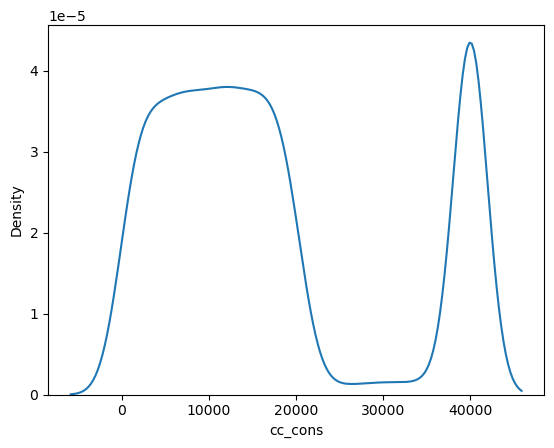

In [19]:
sns.kdeplot(new_Customer_existing.cc_cons)
plt.show()

In [20]:
#MinMax Scaler                   :preprocessing.minmax_scale()/MinMaxScaler
#Standard Scaler                 :preprocessing.StandardScaler()
#MaxAbs Scaler                   :preprocessing.maxabs_scale()
#Robust Scaler                   :preprocessing.RobustScaler()
#Quantile Transform Scaler       :preprocessing.QuantileTransformer()
#Power Transformer Scaler        :preprocessing.power_transform()
#Unit Vector Scaler/Normalizer   :preprocessing.normalize()

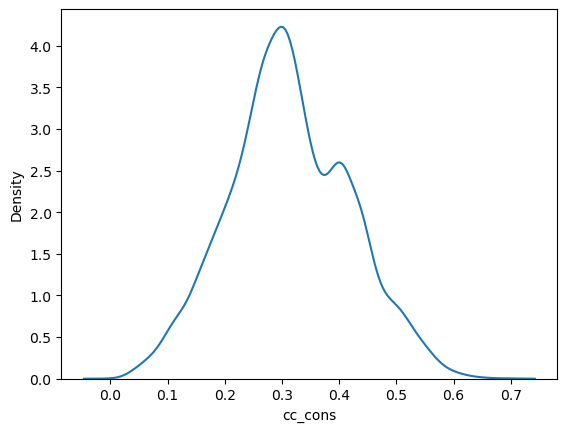

In [21]:
#Normalization
nor=preprocessing.normalize(new_Customer_existing)
#Transformation
Transf_nor=np.cbrt(nor)
Transf_nor=pd.DataFrame(Transf_nor,columns=new_Customer_existing.columns)
sns.kdeplot(Transf_nor.cc_cons)
plt.show()

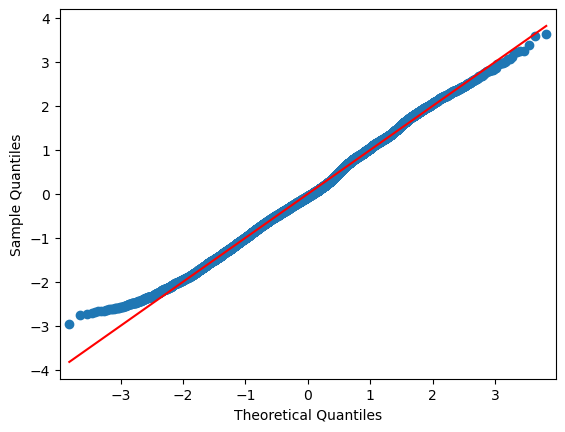

In [22]:
qqplot(Transf_nor.cc_cons,line='s',fit=True)

In [23]:
# analyze whether two population means are different or not using z_test/Z_score
Z_score=Transf_nor
Z_score_df = (Z_score - Z_score.mean())/Z_score.std()
Z_score_df.head()

,cc_cons,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,NetBanking_Flag,Avg_days_between_transaction,Income_HIGH,Income_LOW,Income_MEDIUM,account_type_current,account_type_saving,gender_F,gender_M,loan_enq_Y
0,0.305185,0.700985,-1.466770,-0.046627,1.513510,0.689071,1.012074,-1.133701,0.061359,-0.879443,...,-1.558065,0.642085,-0.292293,-0.615501,0.655727,0.300466,-0.418787,-0.394723,0.270436,-0.304407
1,-0.109258,0.697807,-0.936866,0.955143,-1.525260,-0.349622,-0.903481,-1.271868,-0.706421,-0.530824,...,-1.558065,0.769272,3.547311,-0.615501,-1.307318,0.541137,-0.418787,-0.394723,0.520119,0.412231
2,-0.066783,-0.733291,-0.568604,-1.233101,-0.273884,0.976877,0.048174,0.601246,0.117411,1.034518,...,0.424961,-1.656024,-0.292293,-0.615501,0.563685,0.180849,-0.418787,-0.394723,0.146340,-0.660587
3,-0.354704,1.298863,-0.795281,0.411922,0.988759,1.115718,1.601412,1.254431,-1.586349,0.692647,...,0.725041,-0.950654,-0.292293,-0.615501,0.846813,0.548801,-0.418787,2.647309,-2.376263,0.435053
4,1.024587,-0.510593,0.188001,-0.763798,-0.749487,-1.059662,0.348750,1.095491,0.530218,0.828091,...,0.455870,-0.739913,-0.292293,-0.615501,0.592847,0.218748,-0.418787,-0.394723,0.185658,-7.900929


In [24]:
#Null Hypothesis: H0 : μ=μ0  [ the population means are equal]
#Alternative hyphothesis:Ha :μ!=μ0 [ the population means are not equal.]
from statsmodels.stats import weightstats as stests
for i in Transf_nor.columns:
    ztest,propability_value=stests.ztest(Transf_nor[i],alternative='two-sided',)
    print(float(propability_value))
    if propability_value<0.05:
        print(i,": Null hyphothesis rejected , Alternative hyphothesis accepted")
    else:
        print(i,": Null hyphothesis accepted , Alternative hyphothesis rejected")

0.0
cc_cons : Null hyphothesis rejected , Alternative hyphothesis accepted
0.0
cc_cons_apr : Null hyphothesis rejected , Alternative hyphothesis accepted
0.0
dc_cons_apr : Null hyphothesis rejected , Alternative hyphothesis accepted
0.0
cc_cons_may : Null hyphothesis rejected , Alternative hyphothesis accepted
0.0
dc_cons_may : Null hyphothesis rejected , Alternative hyphothesis accepted
0.0
cc_cons_jun : Null hyphothesis rejected , Alternative hyphothesis accepted
0.0
dc_cons_jun : Null hyphothesis rejected , Alternative hyphothesis accepted
0.0
cc_count_apr : Null hyphothesis rejected , Alternative hyphothesis accepted
0.0
cc_count_may : Null hyphothesis rejected , Alternative hyphothesis accepted
0.0
cc_count_jun : Null hyphothesis rejected , Alternative hyphothesis accepted
0.0
dc_count_apr : Null hyphothesis rejected , Alternative hyphothesis accepted
0.0
dc_count_may : Null hyphothesis rejected , Alternative hyphothesis accepted
0.0
dc_count_jun : Null hyphothesis rejected , Alte

In [25]:
#checking distribution(skew):
#Zero skew: mean = median
#Right skew: mean > median
#Left skew: mean < median
for i in Transf_nor.columns:  
    men=Transf_nor[i].mean()
    med=Transf_nor[i].median()
    if men>med:
        print(i,'-','mean:',men,'-','median',med,'-',': Right skew')
    elif men<med:
        print(i,'-','mean:',men,'-','median',med,'-',': Left skew')
    else :
        print(i,'-','mean:',men,'-','median',med,'-',': Zero skew')

cc_cons - mean: 0.31302925226090655 - median 0.30675780819241105 - : Right skew
cc_cons_apr - mean: 0.2954865999229904 - median 0.2833715760707377 - : Right skew
dc_cons_apr - mean: 0.2182005080046231 - median 0.20812396007302736 - : Right skew
cc_cons_may - mean: 0.2814493096706264 - median 0.26753523250053585 - : Right skew
dc_cons_may - mean: 0.21307993439993783 - median 0.20436763983269846 - : Right skew
cc_cons_jun - mean: 0.25763542322042265 - median 0.24670304861328896 - : Right skew
dc_cons_jun - mean: 0.20568436673640994 - median 0.19552742226362155 - : Right skew
cc_count_apr - mean: 0.03329585826416265 - median 0.02906567415912275 - : Right skew
cc_count_may - mean: 0.03678564340852768 - median 0.035602020083591646 - : Right skew
cc_count_jun - mean: 0.04082498923557949 - median 0.04219033653279046 - : Left skew
dc_count_apr - mean: 0.028659330399627026 - median 0.02502947363582654 - : Right skew
dc_count_may - mean: 0.026683098696041824 - median 0.02307281282997583 - : Righ

In [26]:
#checking skew distribution:
#  A skewness value greater than 1 or less than -1 indicates a highly skewed distribution.
#  A value between 0.5 and 1 or -0.5 and -1 is moderately skewed. 
# A value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical.
for i, j in zip(Transf_nor.skew(), Transf_nor.columns):
    if i>1 or i<-1:
        print(j,'-','skewness value:',i,'-','highly skewed distribution')
    elif 0.5<i<1 or -0.5<i<-1:
        print(j,'-','skewness value:',i,'-','moderately skewed')
    elif -0.5<i<0.5:
        print(j,'-','skewness value:',i,'-','fairly symmetrical')

cc_cons - skewness value: 0.12460522431807293 - fairly symmetrical
cc_cons_apr - skewness value: 0.46694618977766017 - fairly symmetrical
dc_cons_apr - skewness value: 0.45828129686373853 - fairly symmetrical
cc_cons_may - skewness value: 0.47886269920909164 - fairly symmetrical
dc_cons_may - skewness value: 0.44140828467664256 - fairly symmetrical
cc_cons_jun - skewness value: 0.4568129575133774 - fairly symmetrical
dc_cons_jun - skewness value: 0.4909448510514027 - fairly symmetrical
cc_count_apr - skewness value: 0.7238994195977501 - moderately skewed
cc_count_may - skewness value: 0.35179385957498305 - fairly symmetrical
cc_count_jun - skewness value: 0.09697985867386204 - fairly symmetrical
dc_count_apr - skewness value: 0.5529346415599576 - moderately skewed
dc_count_may - skewness value: 0.7215141585551585 - moderately skewed
dc_count_jun - skewness value: 0.23300450454728747 - fairly symmetrical
card_lim - skewness value: -1.128026771631091 - highly skewed distribution
investme

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


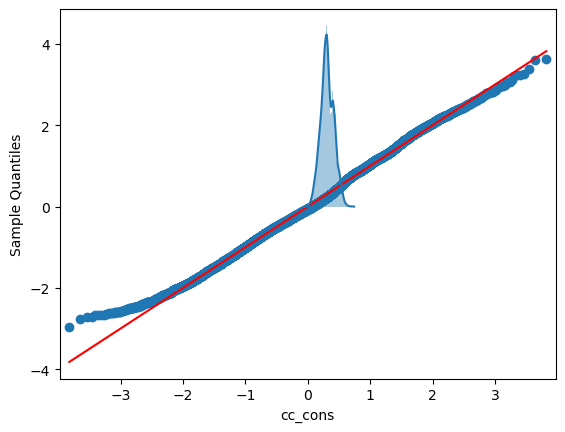

<Figure size 640x480 with 0 Axes>

In [27]:
sns.distplot(Transf_nor.cc_cons)
fig = plt.figure()
plt.show()

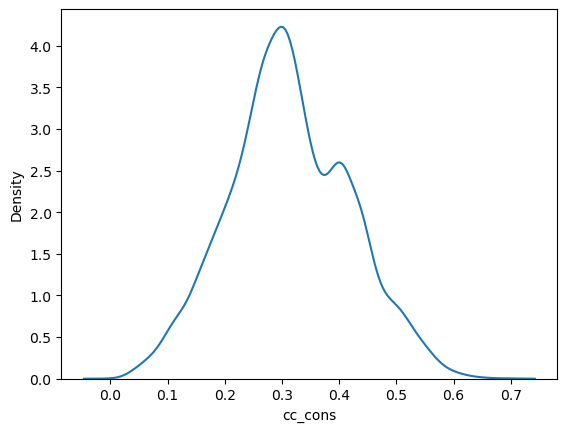

In [28]:
sns.kdeplot(Transf_nor.cc_cons)
plt.show()

In [29]:
#Detecting Multicollinearity with Variance Inflation Factor(VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=Transf_nor
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)for i in range(len(X.columns))]
print(vif_data)

                         feature          VIF
0                        cc_cons    11.412316
1                    cc_cons_apr     9.669659
2                    dc_cons_apr     8.271373
3                    cc_cons_may     9.159576
4                    dc_cons_may     9.131796
5                    cc_cons_jun     9.729549
6                    dc_cons_jun     8.628028
7                   cc_count_apr     6.238688
8                   cc_count_may     8.434848
9                   cc_count_jun     9.269674
10                  dc_count_apr     5.811129
11                  dc_count_may     6.367674
12                  dc_count_jun     6.332011
13                      card_lim    13.096700
14                  investment_1     3.818980
15                  investment_2     6.270646
16                  investment_3     4.723716
17                  investment_4     1.321924
18              debit_amount_apr    11.594325
19             credit_amount_apr    12.578625
20               debit_count_apr  

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [30]:

vif_data=pd.DataFrame(vif_data)
#vif_data
vif_data.feature[vif_data.VIF<10]

1          cc_cons_apr
2          dc_cons_apr
3          cc_cons_may
4          dc_cons_may
5          cc_cons_jun
6          dc_cons_jun
7         cc_count_apr
8         cc_count_may
9         cc_count_jun
10        dc_count_apr
11        dc_count_may
12        dc_count_jun
14        investment_1
15        investment_2
16        investment_3
17        investment_4
21    credit_count_apr
25    credit_count_may
26     debit_count_may
30    credit_count_jun
31     debit_count_jun
33          emi_active
38     NetBanking_Flag
Name: feature, dtype: object

In [31]:
#Removing multicollinearity:
nor_data=Transf_nor[['cc_cons',
         'cc_cons_apr',
          'dc_cons_apr',
          'cc_cons_may',
          'dc_cons_may',
          'cc_cons_jun',
          'dc_cons_jun',
         'cc_count_apr',
         'cc_count_may',
         'cc_count_jun',
        'dc_count_apr',
        'dc_count_may',
        'dc_count_jun',
        'investment_1',
        'investment_2',
        'investment_3',
        'investment_4',
    'credit_count_apr',
    'credit_count_may',
     'debit_count_may',
    'credit_count_jun',
     'debit_count_jun',
          'emi_active',
     'NetBanking_Flag']]

In [32]:
nor_data

,cc_cons,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,investment_2,investment_3,investment_4,credit_count_apr,credit_count_may,debit_count_may,credit_count_jun,debit_count_jun,emi_active,NetBanking_Flag
0,0.345225,0.371264,0.091937,0.276546,0.333441,0.322337,0.286439,0.016020,0.037669,0.027394,...,0.136756,0.117395,0.241894,0.023105,0.016020,0.043485,0.016020,0.051124,0.150979,0.000000
1,0.301503,0.370921,0.137552,0.381888,0.091785,0.224807,0.133595,0.013915,0.026618,0.032718,...,0.774857,0.624786,0.159284,0.045945,0.017531,0.059453,0.038390,0.055368,0.327546,0.000000
2,0.305984,0.216217,0.169253,0.151782,0.191299,0.349361,0.209528,0.042458,0.038476,0.056624,...,0.942253,0.356822,0.188032,0.025209,0.015269,0.052651,0.023183,0.012119,0.334464,0.012119
3,0.275610,0.435896,0.149740,0.324765,0.291710,0.362398,0.333462,0.052411,0.013953,0.051403,...,0.846604,0.508838,-0.233373,0.043355,0.039680,0.046909,0.038495,0.060864,0.212738,0.013953
4,0.421118,0.240291,0.234384,0.201132,0.153477,0.158137,0.233511,0.049989,0.044417,0.053472,...,0.895376,0.592968,0.234497,0.040640,0.035502,0.045343,0.024616,0.039075,0.287762,0.012308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14992,0.193220,0.260474,0.127291,0.230659,0.187138,0.223898,0.257644,0.017186,0.039347,0.017186,...,0.343729,0.301614,0.118244,0.015014,0.011916,0.023833,0.028720,0.023833,0.328872,0.011916
14993,0.270933,0.377854,0.224963,0.306962,0.239483,0.158664,0.114952,0.012175,0.039443,0.019327,...,0.736113,0.281331,-0.224646,0.015340,0.019327,0.033049,0.027078,0.031908,0.204839,0.012175
14994,0.463893,0.217861,0.133224,0.364057,0.107179,0.426333,0.164980,0.052178,0.038557,0.053371,...,0.857510,0.396442,0.294131,0.013558,0.039108,0.023184,0.021522,0.056664,0.192839,0.013558
14995,0.347825,0.409136,0.218992,0.394037,0.297527,0.311416,0.113834,0.021704,0.051403,0.040054,...,0.831744,0.179726,-0.189562,0.034858,0.016363,0.033175,0.016363,0.048887,0.266822,0.011346


In [33]:
#checking corr with target('cc_cons'):

#new_Customer_existing.corr()['cc_cons']
#data.corr()['cc_cons']
#normalized.corr()['cc_cons']
nor_data.corr()['cc_cons']

cc_cons             1.000000
cc_cons_apr         0.133798
dc_cons_apr         0.125384
cc_cons_may         0.127530
dc_cons_may         0.115634
cc_cons_jun         0.133578
dc_cons_jun         0.115471
cc_count_apr        0.090948
cc_count_may        0.130893
cc_count_jun        0.129752
dc_count_apr        0.108036
dc_count_may        0.103096
dc_count_jun        0.104870
investment_1       -0.037856
investment_2       -0.072922
investment_3        0.050990
investment_4        0.030352
credit_count_apr    0.094811
credit_count_may    0.099488
debit_count_may     0.124106
credit_count_jun    0.124116
debit_count_jun     0.136938
emi_active          0.122042
NetBanking_Flag     0.077372
Name: cc_cons, dtype: float64

In [34]:
x=nor_data
x.shape

(14997, 24)

In [35]:
#assigning x-y(Target)
y = x.cc_cons
X= x[x.columns.difference(['cc_cons'])]
#Split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=100,test_size=0.3) 

In [ ]:
# OLS Regression Results
import statsmodels.api as sm
import pandas as pd
 
# reading data from the csv
data = new_Customer_existing
 
# defining the variables
x = data[data.columns.difference(['cc_cons'])]
y = data[['cc_cons']]
 
# adding the constant term
x = sm.add_constant(x)
 
# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
 
# printing the summary table
print(result.summary())

In [36]:
#Feature selection
#https://scikit-learn.org/stable/modules/feature_selection.html
#.1. Removing features with low variance
#.2. Univariate feature selection
#.3. Recursive feature elimination
#.4. Feature selection using SelectFromModel
#.5. Sequential Feature Selection
#.6. Feature selection as part of a pipeline

#There are  types of feature selection method: 
#https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/

#A. Filter methods                      -high Faster process/avoids overfitting
#1.Information Gain
#2.Chi-square Test [cat(nom)-cat(nom)]
#3.Fisher’s Score
#4.Correlation Coefficient
#5.Variance Threshold
#6.Mean Absolute Difference (MAD)
#7.Dispersion ratio
#8.ANOVA         [cat(ord/nom)-num]
#9.Pearson correlation

#B. Wrapper methods                     -lower faster process/prone to overfitting
#1.Forward Feature Selection (stepwise selection)
#2.Backward Feature Elimination
#3.Exhaustive Feature Selection
#4.Recursive Feature Elimination

#C. Embedded methods                    -medium fatser process/less prone to overfitting
#1.LASSO Regularization (L1)
#2.Random Forest Importance
#3.Ridge
#4.Decision Tree

#D. Hybrid methods

In [37]:
###Filter methods 

#--------------------------------------------------------------------------------

#1.Information Gain:
import sklearn.feature_selection as feature_selection
#Importing mutual information gain
#The higher the value the more important that feature will be or you can say that the dependency of that independent feature will be more on the dependent feature.
# determine the mutual information
#mutual_info_regression:
mutual_info=feature_selection.mutual_info_regression(X_train,y_train,n_neighbors=3)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
#r_regression:
r_regression=feature_selection.r_regression(X_train,y_train)
r_regression = pd.Series(r_regression)
r_regression.index = X_train.columns
#compering [mutual_info-r_regression]:
df1 = pd.DataFrame(mutual_info).reset_index()
df2 = pd.DataFrame(r_regression).reset_index()
Information_Gain=pd.merge(df1,df2,on='index')
Information_Gain[['col_name','mutual_info','r_regression']]=pd.merge(df1,df2,on='index')
col=Information_Gain.columns.drop(['index','0_x','0_y'])
Information_Gain=Information_Gain[col]
#Information_Gain
#--------------------------------------------------------------------------------
#2.Chi-square:
#Perform chi2 test
from sklearn.feature_selection import chi2
#Calculating Fscore and p value
#f_p_values=chi2(X_train,y_train)
#F_p_values
#data is not non-negative, maybe chi2 is not a good method.


#--------------------------------------------------------------------------------

#3.Fisher’s Score:
#!pip install skfeature-chappers
from skfeature.function.similarity_based import fisher_score
#fisher_score=fisher_score.fisher_score(X_train,y_train)

#--------------------------------------------------------------------------------

#4.Correlation Coefficient:
#correlation coefficients 3 method:
#i.pearsonr() [num-num]
pearson=X_train.corrwith(y_train,method='pearson').reset_index()
#ii.spearmanr() [cat(ord)-num]
spearman=X_train.corrwith(y_train,method='spearman').reset_index()
#iii.kendalltau() [cat(ord)-num(Conti)]
kendall=X_train.corrwith(y_train,method='kendall').reset_index()

#correlation=pd.merge(pearson,spearman,on='index')
correlations=pd.merge(pd.merge(pearson,spearman,on='index'),kendall,on='index')
correlations=correlations[['col_name','pearson','spearman','kendall']]=pd.merge(pd.merge(pearson,spearman,on='index'),kendall,on='index')
col=correlations.columns.drop(['index','0_x','0_y',0])
correlations=correlations[col]
#correlations

#--------------------------------------------------------------------------------

#5.Variance Threshold:
selector=feature_selection.VarianceThreshold()
transf=selector.fit_transform(X_train,y_train)
Variance_Threshold=pd.DataFrame(transf,columns=X_train.columns).T

#--------------------------------------------------------------------------------

#6.Mean Absolute Difference (MAD)-[X_train]
Mean_Absolute_Difference=np.sum(np.abs(X_train-np.mean(X_train,axis=0)))/X_train.shape[0]
Mean_Absolute_Difference=Mean_Absolute_Difference.reset_index()
Mean_Absolute_Difference.rename(columns = {'index':'col_name',0:'MAD'}, inplace = True)
#Mean_Absolute_Difference-[y_train]
Mean_Absolute_Difference_y=np.sum(np.abs(y_train-np.mean(y_train,axis=0)))/y_train.shape[0] #-[y_train]

#--------------------------------------------------------------------------------

#7.Dispersion ratio = [arithmetic_mean (AM) /geometric_mean (GM)]
XX=X_train+1 #to avoid 0 drnominator we add 1 here
AM=np.mean(XX,axis=0)
GM=np.power(np.prod(XX,axis=0),1/XX.shape[0])
Dispersion_ratio=AM/GM
Dispersion_ratio=Dispersion_ratio.reset_index()
Dispersion_ratio.rename(columns = {'index':'col_name',0:'Dispersion_ratio'}, inplace = True)
#Dispersion_ratio

#--------------------------------------------------------------------------------

#8.ANOVA
#stats.f_oneway(X_train,y_train)
#--------------------------------------------------------------------------------

Filter=pd.merge(pd.merge(Information_Gain,correlations,on='col_name'),Dispersion_ratio,on='col_name')

###############################################################################################################
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression,mutual_info_regression,f_oneway
#-----------------------------f_regression:
select_kf_R= SelectKBest(score_func=f_regression, k=7)
z = select_kf_R.fit_transform(X_train, y_train) 
selected_F_R=X_train.columns[select_kf_R.get_support()]
#----------------------------mutual_info_regression:
select_km_infoR = SelectKBest(score_func=mutual_info_regression, k=7)
z = select_km_infoR.fit_transform(X_train, y_train) 
selected_M_INFO_R=X_train.columns[select_km_infoR.get_support()]
#----------------------------f_oneway:
select_kfO_R = SelectKBest(score_func=f_oneway, k=7)
z = select_kfO_R.fit_transform(X_train, y_train) 
selected_F_OW_R=X_train.columns[select_kfO_R.get_support()]


#using above result we will check that how many columns commonly get from result:
#list(selected_F_R.intersection(selected_M_INFO_R.intersection(selected_F_OW_R)))

list(selected_F_R.union(selected_M_INFO_R.union(selected_F_OW_R)))


C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\numpy\core\_methods.py:52: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)


['NetBanking_Flag',
 'cc_cons_apr',
 'cc_cons_jun',
 'cc_cons_may',
 'cc_count_apr',
 'cc_count_jun',
 'cc_count_may',
 'credit_count_apr',
 'credit_count_jun',
 'credit_count_may',
 'dc_cons_apr',
 'dc_count_apr',
 'dc_count_may',
 'debit_count_jun']

In [38]:
#B. Wrapper methods                                                           *** importing pckg  ***
#1.Forward Feature Selection [/stepwise selection]      from mlxtend.feature_selection import SequentialFeatureSelector as sfs
#2.Backward Feature Elimination                         from mlxtend.feature_selection import SequentialFeatureSelector as sfs
#3.Exhaustive Feature Selection                         from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
#4.Recursive Feature Elimination                        from sklearn.feature_selection import RFE

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

#scoring:
#{'accuracy', 'f1', 'precision', 'recall', 'roc_auc'} for classifiers,
#{'mean_absolute_error', 'mean_squared_error'/'neg_mean_squared_error','median_absolute_error', 'r2'} for regressors


In [39]:

########################### #1.Forward Feature Selection:
lr = LinearRegression()
#rgr = RandomForestRegressor(n_estimators=50, n_jobs=-1)

# Build step forward feature selection
sfs1 = sfs(lr,
           k_features=15,
           forward=True, #[Forward selection if True, backward selection otherwise]
           verbose=2,
           scoring='r2',
           cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)



##########################################2.Backward Feature Elimination
lr = LinearRegression()
#rgr = RandomForestRegressor(n_estimators=50, n_jobs=-1)

# Build step Backward feature selection
sfs2 = sfs(lr,
           k_features=15,
           forward=False, #[Forward selection if True, backward selection otherwise]
           verbose=2,
           scoring='r2',
           cv=5)

# Perform SFFS
sfs2 = sfs2.fit(X_train, y_train)

# Which features?
forward_feat_cols = list(sfs1.k_feature_idx_)
backward_feat_cols = list(sfs2.k_feature_idx_)

print('Forward selection:',forward_feat_cols,'backward selection:',backward_feat_cols)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.0s finished

[2022-12-16 08:07:10] Features: 1/15 -- score: 0.018313735774939287[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.1s finished

[2022-12-16 08:07:10] Features: 2/15 -- score: 0.033313305458963584[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.1s finished

[2022-12-16 08:07:10] Features: 3/15 -- score: 0.044739913914192034[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: 

Forward selection: [1, 2, 3, 5, 6, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18] backward selection: [1, 2, 3, 5, 6, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18]


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.3s finished

[2022-12-16 08:07:16] Features: 15/15 -- score: 0.08957051256433309

In [67]:
# C. Embedded methods :                               *** importing pckg  ***
#1.LASSO Regularization (L1)                                - from sklearn.linear_model import Lasso,LassoCV
#2.Random Forest Importance                                 -from sklearn.ensemble import RandomForestRegressor
#3.Ridge                                                    -from sklearn.linear_model import Ridge,RidgeCV,ridge_regression
#4.Decision Tree                                            -from sklearn.tree import DecisionTreeRegressor
#ElasticNet                                                 -from sklearn.linear_model import ElasticNet

from sklearn.linear_model import Lasso,LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge,RidgeCV,ridge_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectFromModel

In [79]:


######################################## 1.LASSO Regularization (L1)
#                            (Least Absolute Shrinkage and Selection Operator)

sel_ = SelectFromModel(Lasso(alpha=0.001, random_state=100))
sel_.fit(X_train, y_train)
sel_.get_support()
l=X_train.columns[sel_.get_support()]

####################################### 2.ElasticNet

sel_ = SelectFromModel(ElasticNet(alpha=0.001, random_state=100))
sel_.fit(X_train, y_train)
sel_.get_support()
e=X_train.columns[sel_.get_support()]
######################################### 3.Ridge
sel_ = SelectFromModel(Ridge(alpha=0.001, random_state=100))
sel_.fit(X_train, y_train)
sel_.get_support()
r=X_train.columns[sel_.get_support()]
(l.union(e)).union(r)

Index(['NetBanking_Flag', 'cc_cons_apr', 'cc_cons_jun', 'cc_cons_may',
       'cc_count_jun', 'cc_count_may', 'credit_count_apr', 'credit_count_jun',
       'credit_count_may', 'dc_cons_apr', 'dc_cons_jun', 'dc_cons_may',
       'dc_count_apr', 'dc_count_jun', 'dc_count_may', 'debit_count_jun',
       'debit_count_may', 'emi_active', 'investment_1', 'investment_2'],
      dtype='object')

In [ ]:
#feature importance:

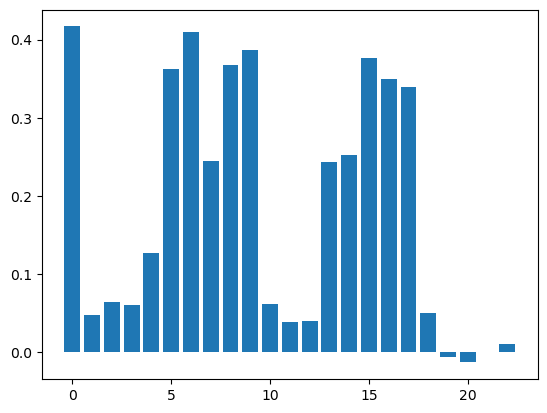

In [80]:
################################################ 1)LinearRegression
from sklearn.linear_model import LinearRegression
# define the model
model = LinearRegression()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.coef_
# summarize feature importance
#for i,v in enumerate(importance):
    
 #print('Feature: %0d, Score: %.5f' % (i,v))
LR_feature_importance=pd.DataFrame(importance,X_train.columns).sort_values(0,ascending=False)
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

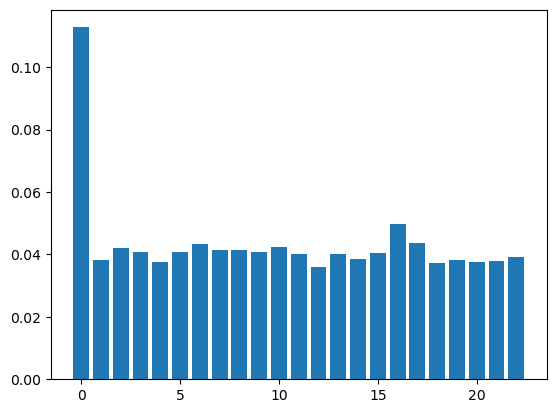

In [81]:
################################## 2.Random Forest Importance

#feature importance:
from sklearn.ensemble import RandomForestRegressor 
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
#for i,v in enumerate(importance):
    
 #print('Feature: %0d, Score: %.5f' % (i,v))
RFR_feature_importance=pd.DataFrame(importance,X_train.columns).sort_values(0,ascending=False)
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()


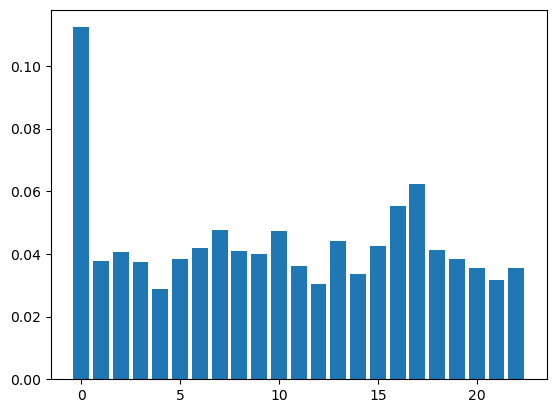

In [82]:
################################### 3.Decision Tree

#feature importance:
from sklearn.tree import DecisionTreeRegressor 
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
#for i,v in enumerate(importance):
    
 #print('Feature: %0d, Score: %.5f' % (i,v))
DTR_feature_importance=pd.DataFrame(importance,X_train.columns).sort_values(0,ascending=False)
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

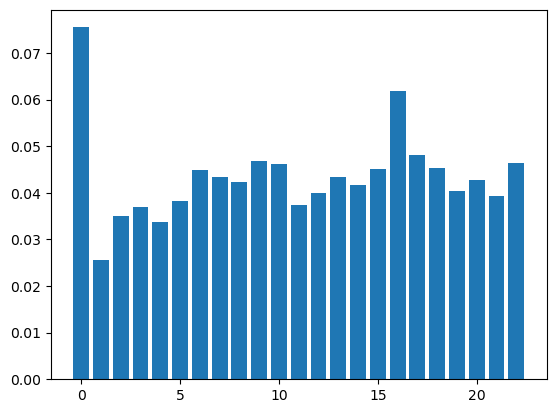

In [83]:

##################################XGBoost
from xgboost import XGBRegressor
# define the model
model = XGBRegressor()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
#for i,v in enumerate(importance):
# print('Feature: %0d, Score: %.5f' % (i,v))
XGB_feature_importance=pd.DataFrame(importance,X_train.columns).sort_values(0,ascending=False)
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()


In [86]:
D=DTR_feature_importance.reset_index()
R=RFR_feature_importance.reset_index()
L=LR_feature_importance.reset_index()
X=XGB_feature_importance.reset_index()
Feature_importance=pd.merge(pd.merge(pd.merge(R,D,on='index'),L,on='index'),X,on='index')
Feature_importance.columns = ['columns', 'RFR', 'DTR','LR','XGB']
Feature_importance

C:\Users\Shubham Jadhav\AppData\Local\Temp\ipykernel_8116\1199981498.py:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'0_x'} in the result is deprecated and will raise a MergeError in a future version.
  Feature_importance=pd.merge(pd.merge(pd.merge(R,D,on='index'),L,on='index'),X,on='index')


,columns,RFR,DTR,LR,XGB
0,NetBanking_Flag,0.112746,0.112333,0.416768,0.075496
1,debit_count_jun,0.049788,0.055231,0.349453,0.061887
2,debit_count_may,0.043659,0.062200,0.339066,0.048102
3,cc_count_may,0.043246,0.041960,0.409303,0.044868
4,dc_cons_apr,0.042260,0.047289,0.061177,0.046109
5,cc_cons_jun,0.042058,0.040526,0.064407,0.034979
6,credit_count_apr,0.041300,0.047725,0.244652,0.043403
7,credit_count_jun,0.041254,0.040909,0.368085,0.042386
8,credit_count_may,0.040881,0.040064,0.387011,0.046869
9,cc_count_jun,0.040801,0.038457,0.362155,0.038139


In [88]:
sel_ = SelectFromModel(RandomForestRegressor(criterion='mae',n_estimators=100,n_jobs=-1,random_state=100,bootstrap=True))
sel_.fit(X_train, y_train)
sel_.get_support()
X_train.columns[sel_.get_support()]


C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


Index(['NetBanking_Flag', 'cc_count_may', 'debit_count_jun',
       'debit_count_may'],
      dtype='object')

In [ ]:
#poission
Index(['cc_cons_apr', 'cc_cons_may', 'cc_count_jun', 'cc_count_may',
       'credit_count_jun', 'dc_cons_jun', 'dc_cons_may', 'dc_count_apr',
       'dc_count_jun', 'dc_count_may', 'debit_count_may', 'investment_1',
       'investment_2', 'investment_3', 'investment_4'],
      dtype='object')

In [ ]:
#absolute_error
Index(['NetBanking_Flag', 'cc_count_may', 'debit_count_jun',
       'debit_count_may'],
      dtype='object')

In [ ]:
#mae
Index(['NetBanking_Flag', 'cc_count_may', 'debit_count_jun',
       'debit_count_may'],
      dtype='object')

In [85]:
x

,cc_cons,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,investment_2,investment_3,investment_4,credit_count_apr,credit_count_may,debit_count_may,credit_count_jun,debit_count_jun,emi_active,NetBanking_Flag
0,0.345225,0.371264,0.091937,0.276546,0.333441,0.322337,0.286439,0.016020,0.037669,0.027394,...,0.136756,0.117395,0.241894,0.023105,0.016020,0.043485,0.016020,0.051124,0.150979,0.000000
1,0.301503,0.370921,0.137552,0.381888,0.091785,0.224807,0.133595,0.013915,0.026618,0.032718,...,0.774857,0.624786,0.159284,0.045945,0.017531,0.059453,0.038390,0.055368,0.327546,0.000000
2,0.305984,0.216217,0.169253,0.151782,0.191299,0.349361,0.209528,0.042458,0.038476,0.056624,...,0.942253,0.356822,0.188032,0.025209,0.015269,0.052651,0.023183,0.012119,0.334464,0.012119
3,0.275610,0.435896,0.149740,0.324765,0.291710,0.362398,0.333462,0.052411,0.013953,0.051403,...,0.846604,0.508838,-0.233373,0.043355,0.039680,0.046909,0.038495,0.060864,0.212738,0.013953
4,0.421118,0.240291,0.234384,0.201132,0.153477,0.158137,0.233511,0.049989,0.044417,0.053472,...,0.895376,0.592968,0.234497,0.040640,0.035502,0.045343,0.024616,0.039075,0.287762,0.012308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14992,0.193220,0.260474,0.127291,0.230659,0.187138,0.223898,0.257644,0.017186,0.039347,0.017186,...,0.343729,0.301614,0.118244,0.015014,0.011916,0.023833,0.028720,0.023833,0.328872,0.011916
14993,0.270933,0.377854,0.224963,0.306962,0.239483,0.158664,0.114952,0.012175,0.039443,0.019327,...,0.736113,0.281331,-0.224646,0.015340,0.019327,0.033049,0.027078,0.031908,0.204839,0.012175
14994,0.463893,0.217861,0.133224,0.364057,0.107179,0.426333,0.164980,0.052178,0.038557,0.053371,...,0.857510,0.396442,0.294131,0.013558,0.039108,0.023184,0.021522,0.056664,0.192839,0.013558
14995,0.347825,0.409136,0.218992,0.394037,0.297527,0.311416,0.113834,0.021704,0.051403,0.040054,...,0.831744,0.179726,-0.189562,0.034858,0.016363,0.033175,0.016363,0.048887,0.266822,0.011346


# Building the Model


In [93]:
XX= x[['NetBanking_Flag', 'cc_cons_apr', 'cc_cons_jun', 'cc_cons_may',
       'cc_count_jun', 'cc_count_may', 'credit_count_apr', 'credit_count_jun',
       'credit_count_may', 'dc_cons_apr', 'dc_cons_jun', 'dc_cons_may',
       'dc_count_apr', 'dc_count_jun', 'dc_count_may', 'debit_count_jun',
       'debit_count_may', 'emi_active', 'investment_1', 'investment_2']]  #the top 3 features
YY= x[['cc_cons']]  #the target output
#Second, split the dataset into train and test:
XX_train,XX_test,YY_train,YY_test=train_test_split(XX,YY,test_size=0.4,random_state=50)

In [94]:
#train accuracy metrics
#Mean Squared Error (MSE).
#Root Mean Squared Error (RMSE).
#Mean Absolute Error (MAE)

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lreg= LinearRegression()
lreg=lreg.fit(XX_train,YY_train)

#train accuracy metrics:
YY_pred=lreg.predict(XX_train)

print('regression score(r2): ',metrics.r2_score(YY_train, YY_pred))
print('Root Mean Squared Error (RMSE): ',np.sqrt(metrics. mean_squared_error(YY_train, YY_pred)))
print('Mean Squared Error (MSE): ',metrics.mean_squared_error(YY_train, YY_pred))
print('Mean Absolute Error (MAE): ',metrics.mean_absolute_error(YY_train, YY_pred))

regression score(r2):  0.09871637522972931
Root Mean Squared Error (RMSE):  0.10005830518250367
Mean Squared Error (MSE):  0.010011664435995039
Mean Absolute Error (MAE):  0.07960768745961093


In [96]:
#testing accuracy metrics
YY_pred=lreg.predict(XX_test)
from sklearn import metrics
print('regression score(r2): ',metrics.r2_score(YY_test, YY_pred))
print('Root Mean Squared Error (RMSE): ',np.sqrt(metrics. mean_squared_error(YY_test, YY_pred)))
print('Mean Squared Error (MSE): ',metrics.mean_squared_error(YY_test, YY_pred))
print('Mean Absolute Error (MAE): ',metrics.mean_absolute_error(YY_test, YY_pred))

regression score(r2):  0.09392186126564905
Root Mean Squared Error (RMSE):  0.10055186257485788
Mean Squared Error (MSE):  0.010110677067273104
Mean Absolute Error (MAE):  0.0798301537940851


In [97]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

In [98]:
estimator=DecisionTreeRegressor()
es_param_grid={
    'criterion':["squared_error", "friedman_mse", "absolute_error", "poisson",'mae','mse'],
    'splitter':['best'],
    'max_depth':[2,3,4],
    'min_samples_split':[1,2,3,4],
    'min_samples_leaf':[1,2,3],
    'min_weight_fraction_leaf':[0.0],
    'max_features':["auto", "sqrt", "log2"],
    'random_state':None,
    'max_leaf_nodes':None,
    'min_impurity_decrease':[0.0],
    'ccp_alpha':[0.0],
    'n_estimators': [100, 80, 60, 55, 51, 45]
             }
gs_param_grid={'scoring':['r2'],
    'n_jobs':-1,
    'refit':True,
    'cv':[5,6,7,8,9,10],
    'verbose':[3],
    'pre_dispatch':['2*n_jobs'],
    'error_score':['raise'],
    'return_train_score':[True],
              }
grid=GridSearchCV(estimator,es_param_grid,cv='cv',scoring='r2')
grid.fit(XX_train, yy_train)

ValueError: Parameter grid for parameter (random_state) needs to be a list or numpy array, but got (<class 'NoneType'>). Single values need to be wrapped in a list with one element.

In [99]:
estimator=DecisionTreeRegressor()
es_param_grid={
    'criterion':["squared_error", "friedman_mse", "absolute_error", "poisson"],
    'max_depth':[2,3,4],
    'min_samples_split':[1,2,3,4],
    'min_samples_leaf':[1,2,3],
   
    #'max_features':["auto", "sqrt", "log2"],
  
    #'n_estimators': [100, 80, 60, 55, 51, 45]
             }
gs_param_grid={'scoring':['r2'],
    'n_jobs':-1,
    'refit':True,
    'cv':[5,6,7,8,9,10],
    'verbose':[3],
    'pre_dispatch':['2*n_jobs'],
    'error_score':['raise'],
    'return_train_score':[True],
              }
grid=GridSearchCV(estimator,es_param_grid,cv=10,scoring='r2',n_jobs=-1)
grid.fit(XX_train, YY_train)
print(grid.best_params_)

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
360 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1315, in fit
    super().fit(
  File "C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an

{'criterion': 'absolute_error', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [100]:
lreg=grid.fit(XX_train,YY_train)

#train accuracy metrics:
YY_pred=lreg.predict(XX_train)

print('regression score(r2): ',metrics.r2_score(YY_train, YY_pred))
print('Root Mean Squared Error (RMSE): ',np.sqrt(metrics. mean_squared_error(YY_train, YY_pred)))
print('Mean Squared Error (MSE): ',metrics.mean_squared_error(YY_train, YY_pred))
print('Mean Absolute Error (MAE): ',metrics.mean_absolute_error(YY_train, YY_pred))

C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
360 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1315, in fit
    super().fit(
  File "C:\Users\Shubham Jadhav\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an

regression score(r2):  0.0991720509604862
Root Mean Squared Error (RMSE):  0.10003300798167362
Mean Squared Error (MSE):  0.01000660268586158
Mean Absolute Error (MAE):  0.0793107075288997


In [101]:
param_grid = {'n_estimators': [100, 80, 60, 55, 51, 45],  
              'max_depth': [7, 8],
              'reg_lambda' :[0.26, 0.25, 0.2]
             }
                
grid = GridSearchCV(XGBRFRegressor(), param_grid, refit = True, verbose = 3, n_jobs=-1) #
regr_trans = TransformedTargetRegressor(regressor=grid, transformer=QuantileTransformer(output_distribution='normal'))


NameError: name 'XGBRFRegressor' is not defined

In [109]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = LinearRegression()
clf = GridSearchCV(svc, parameters)
clf.fit(XX_train,YY_train)
param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')}
GridSearchCV(estimator=SVC(), param_grid=param_grid)
sorted(clf.cv_results_.keys())

ValueError: Invalid parameter C for estimator LinearRegression(). Check the list of available parameters with `estimator.get_params().keys()`.

In [105]:
#Second, split the dataset into train and test:
XX_train,XX_test,YY_train,YY_test=train_test_split(XX,YY,test_size=0.3,random_state=100)

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

lreg= RandomForestRegressor()
lreg=lreg.fit(XX_train,YY_train)



YY_pred=lreg.predict(XX_test)
#print (XX_test) #test dataset
#print (YY_pred) #predicted values

from sklearn import metrics
print('r2_score: ',metrics.r2_score(YY_test, YY_pred))
print('mean_squared_log_error:',metrics.mean_squared_log_error(YY_test, YY_pred))
print('mean_squared_error:',metrics.mean_squared_error(YY_test, YY_pred))
print('mean_absolute_erroreport:',metrics.mean_absolute_error(YY_test, YY_pred))

C:\Users\Shubham Jadhav\AppData\Local\Temp\ipykernel_2416\1590685938.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  lreg=lreg.fit(XX_train,YY_train)


r2_score:  0.09973418445048365
mean_squared_log_error: 0.0057549450849631095
mean_squared_error: 0.009810479183174925
mean_absolute_erroreport: 0.07831570385125335


In [107]:
model = RandomForestRegressor()
#transforming target variable through quantile transformer
ttr = TransformedTargetRegressor(regressor=model, transformer=QuantileTransformer(output_distribution='normal'))
ttr.fit(X_train, y_train)
yhat = ttr.predict(X_test)
metrics.r2_score(y_test, yhat),metrics.mean_absolute_error(y_test, yhat), np.sqrt(metrics.mean_squared_error(y_test, yhat))

(0.1084854628192603, 0.07772112611060847, 0.09856527662309135)

In [102]:
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm
import xgboost
from xgboost import XGBRFRegressor 
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer

param_grid = {'n_estimators': [100, 80, 60, 55, 51, 45],  
              'max_depth': [7, 8],
              'reg_lambda' :[0.26, 0.25, 0.2]
             }
                
grid = GridSearchCV(XGBRFRegressor(), param_grid, refit = True, verbose = 3, n_jobs=-1) #
regr_trans = TransformedTargetRegressor(regressor=grid, transformer=QuantileTransformer(output_distribution='normal'))

# fitting the model for grid search 
grid_result=regr_trans.fit(X_train, y_train)
best_params=grid_result.regressor_.best_params_
print(best_params)

#using best params to create and fit model
best_model = XGBRFRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"], reg_lambda=best_params["reg_lambda"])
regr_trans = TransformedTargetRegressor(regressor=best_model, transformer=QuantileTransformer(output_distribution='normal'))
regr_trans.fit(X_train, y_train)
yhat = regr_trans.predict(X_test)

#evaluate metrics
metrics.r2_score(y_test, yhat), metrics.mean_absolute_error(y_test, yhat), np.sqrt(metrics.mean_squared_error(y_test, yhat))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'max_depth': 7, 'n_estimators': 51, 'reg_lambda': 0.2}


(0.11399799106555264, 0.0775754886972844, 0.09826007330100149)

In [1]:
#importing packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp
from scipy import stats
import sklearn as skl
from sklearn.impute import KNNImputer
import statsmodels.api as sm
import seaborn as sns

In [2]:
#importing data
Credit=pd.read_excel('CreditConsumptionData.xlsx')
Behavior=pd.read_excel('CustomerBehaviorData.xlsx')
Demographics=pd.read_excel('CustomerDemographics.xlsx')

In [3]:
#cheacking data count:
#Credit.count()
#Behavior.count()
#Demographics.count()

In [4]:
#cheacking data types :
#Credit.dtypes
#Behavior.dtypes
Demographics.dtypes

ID                                int64
account_type                     object
gender                           object
age                               int64
Income                           object
Emp_Tenure_Years                float64
Tenure_with_Bank                  int64
region_code                     float64
NetBanking_Flag                   int64
Avg_days_between_transaction    float64
dtype: object

In [5]:
#cheacking null value :
Credit.isna().sum()
#Behavior.isna().sum()
#Demographics.isna().sum() 

ID            0
cc_cons    5000
dtype: int64

In [6]:
#Credit.describe()
#Behavior.describe()
Demographics.describe()

,ID,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
count,20000.000000,20000.000000,20000.000000,20000.000000,19999.000000,20000.000000,19997.000000
mean,9999.500000,47.672300,15.217250,5.496050,598.959348,0.718000,11.044757
std,5773.647028,30.359771,20.481455,2.870452,220.105230,0.449985,5.480552
min,0.000000,25.000000,0.500000,1.000000,123.000000,0.000000,2.000000
25%,4999.750000,33.000000,5.100000,3.000000,424.000000,0.000000,6.000000
50%,9999.500000,40.000000,9.900000,6.000000,623.000000,1.000000,11.000000
75%,14999.250000,53.000000,18.000000,8.000000,799.000000,1.000000,16.000000
max,19999.000000,223.000000,203.000000,10.000000,974.000000,1.000000,20.000000


In [7]:
#merging data
Customer=Credit.merge(Behavior.merge(Demographics,on='ID'),on='ID')

In [8]:
Customer.isna().sum()

ID                                 0
cc_cons                         5000
cc_cons_apr                        0
dc_cons_apr                        0
cc_cons_may                        1
dc_cons_may                        0
cc_cons_jun                        0
dc_cons_jun                        1
cc_count_apr                       1
cc_count_may                       0
cc_count_jun                       0
dc_count_apr                       0
dc_count_may                       0
dc_count_jun                       0
card_lim                           0
personal_loan_active               0
vehicle_loan_active                0
personal_loan_closed               1
vehicle_loan_closed                0
investment_1                       0
investment_2                       0
investment_3                       2
investment_4                       0
debit_amount_apr                   0
credit_amount_apr                  0
debit_count_apr                    1
credit_count_apr                   0
m

In [9]:
Customer.columns[Customer.isna().sum()>0]  

Index(['cc_cons', 'cc_cons_may', 'dc_cons_jun', 'cc_count_apr',
       'personal_loan_closed', 'investment_3', 'debit_count_apr', 'loan_enq',
       'emi_active', 'account_type', 'gender', 'Income', 'region_code',
       'Avg_days_between_transaction'],
      dtype='object')

In [10]:
Customer.cc_cons.describe()                         

count     15000.000000
mean      55157.729867
std       97670.972252
min           0.000000
25%        6768.000000
50%       13364.000000
75%       20105.750000
max      408382.000000
Name: cc_cons, dtype: float64

In [11]:
Customer.columns

Index(['ID', 'cc_cons', 'cc_cons_apr', 'dc_cons_apr', 'cc_cons_may',
       'dc_cons_may', 'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr',
       'cc_count_may', 'cc_count_jun', 'dc_count_apr', 'dc_count_may',
       'dc_count_jun', 'card_lim', 'personal_loan_active',
       'vehicle_loan_active', 'personal_loan_closed', 'vehicle_loan_closed',
       'investment_1', 'investment_2', 'investment_3', 'investment_4',
       'debit_amount_apr', 'credit_amount_apr', 'debit_count_apr',
       'credit_count_apr', 'max_credit_amount_apr', 'debit_amount_may',
       'credit_amount_may', 'credit_count_may', 'debit_count_may',
       'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun',
       'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun',
       'loan_enq', 'emi_active', 'account_type', 'gender', 'age', 'Income',
       'Emp_Tenure_Years', 'Tenure_with_Bank', 'region_code',
       'NetBanking_Flag', 'Avg_days_between_transaction'],
      dtype='object')

In [12]:
Customer.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,20000.0,9999.500000,5.773647e+03,0.00,4999.750,9999.5000,14999.2500,19999.00
cc_cons,15000.0,55157.729867,9.767097e+04,0.00,6768.000,13364.0000,20105.7500,408382.00
cc_cons_apr,20000.0,17856.990922,2.515888e+04,253.00,4377.000,10214.6425,21189.0000,441031.33
dc_cons_apr,20000.0,8130.453414,1.457219e+04,19.35,1624.650,3964.7500,9339.0200,229255.00
cc_cons_may,19999.0,16188.364717,2.651068e+04,157.00,3635.910,8635.2300,18655.3050,1117246.31
dc_cons_may,20000.0,7702.427191,1.789273e+04,22.00,1634.260,3791.7200,8263.5900,911223.49
cc_cons_jun,20000.0,12135.806021,1.879098e+04,65.00,2999.075,6656.8000,14195.7275,382914.10
dc_cons_jun,19999.0,7109.708341,1.331394e+04,62.00,1361.100,3326.0000,7458.8200,233384.00
cc_count_apr,19999.0,41.611631,9.783547e+01,1.00,5.000,10.0000,44.0000,531.00
cc_count_may,20000.0,33.569100,5.031692e+01,1.00,8.000,23.0000,43.0000,601.00


In [13]:
cust=Customer

In [14]:
cust.isna().sum()

ID                                 0
cc_cons                         5000
cc_cons_apr                        0
dc_cons_apr                        0
cc_cons_may                        1
dc_cons_may                        0
cc_cons_jun                        0
dc_cons_jun                        1
cc_count_apr                       1
cc_count_may                       0
cc_count_jun                       0
dc_count_apr                       0
dc_count_may                       0
dc_count_jun                       0
card_lim                           0
personal_loan_active               0
vehicle_loan_active                0
personal_loan_closed               1
vehicle_loan_closed                0
investment_1                       0
investment_2                       0
investment_3                       2
investment_4                       0
debit_amount_apr                   0
credit_amount_apr                  0
debit_count_apr                    1
credit_count_apr                   0
m

In [15]:
#we can try to fill null value using nearest neighbors(k-Nearest Neighbors)

In [16]:
#imputing  missing value : 
imputer=KNNImputer(n_neighbors=5)
cust[['ID','cc_cons','cc_cons_apr', 'dc_cons_apr', 'cc_cons_may',
       'dc_cons_may', 'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr',
       'cc_count_may', 'cc_count_jun', 'dc_count_apr', 'dc_count_may',
       'dc_count_jun', 'card_lim', 'personal_loan_active',
       'vehicle_loan_active', 'personal_loan_closed', 'vehicle_loan_closed',
       'investment_1', 'investment_2', 'investment_3', 'investment_4',
       'debit_amount_apr', 'credit_amount_apr', 'debit_count_apr',
       'credit_count_apr', 'max_credit_amount_apr', 'debit_amount_may',
       'credit_amount_may', 'credit_count_may', 'debit_count_may',
       'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun',
       'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun',
        'emi_active', 'age',
       'Emp_Tenure_Years', 'Tenure_with_Bank', 'region_code',
       'NetBanking_Flag', 'Avg_days_between_transaction']]=imputer.fit_transform(cust[['ID','cc_cons','cc_cons_apr', 'dc_cons_apr', 'cc_cons_may',
       'dc_cons_may', 'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr',
       'cc_count_may', 'cc_count_jun', 'dc_count_apr', 'dc_count_may',
       'dc_count_jun', 'card_lim', 'personal_loan_active',
       'vehicle_loan_active', 'personal_loan_closed', 'vehicle_loan_closed',
       'investment_1', 'investment_2', 'investment_3', 'investment_4',
       'debit_amount_apr', 'credit_amount_apr', 'debit_count_apr',
       'credit_count_apr', 'max_credit_amount_apr', 'debit_amount_may',
       'credit_amount_may', 'credit_count_may', 'debit_count_may',
       'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun',
       'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun',
        'emi_active', 'age',
       'Emp_Tenure_Years', 'Tenure_with_Bank', 'region_code',
       'NetBanking_Flag', 'Avg_days_between_transaction']])

#imputing object missing value with mode : 
#cols = ['loan_enq', 'account_type', 'gender', 'Income']
#cust[cols]=cust[cols].fillna(cust.mode().iloc[0])
###################----OR----#####################
cust['loan_enq'].replace(['Y'],[1], inplace=True)
cust['account_type'].replace(['current', 'saving'],[1,0], inplace=True)
cust['gender'].replace(['M', 'F'],[1,0], inplace=True)
cust['Income'].replace(['MEDIUM', 'HIGH', 'LOW'],[1,2,0], inplace=True)

cust[['loan_enq','account_type','gender','Income']]=imputer.fit_transform(cust[['loan_enq','account_type','gender','Income']])
cust[['loan_enq','account_type','gender','Income']]=cust[['loan_enq','account_type','gender','Income']].astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cc_cons_jun', ylabel='cc_cons'>

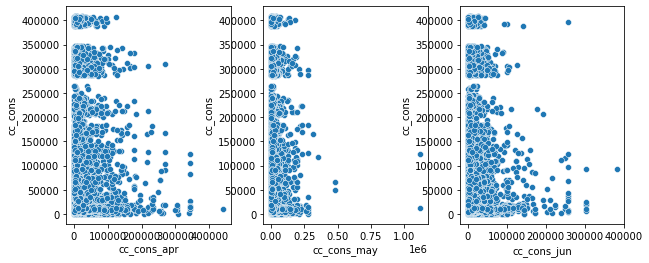

In [17]:
#scatter plot
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10,4))
sns.scatterplot(cust.cc_cons_apr,cust.cc_cons, ax=ax[0])
sns.scatterplot(cust.cc_cons_may,cust.cc_cons,ax=ax[1])
sns.scatterplot(cust.cc_cons_jun,cust.cc_cons,ax=ax[2])

In [18]:
cust.columns

Index(['ID', 'cc_cons', 'cc_cons_apr', 'dc_cons_apr', 'cc_cons_may',
       'dc_cons_may', 'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr',
       'cc_count_may', 'cc_count_jun', 'dc_count_apr', 'dc_count_may',
       'dc_count_jun', 'card_lim', 'personal_loan_active',
       'vehicle_loan_active', 'personal_loan_closed', 'vehicle_loan_closed',
       'investment_1', 'investment_2', 'investment_3', 'investment_4',
       'debit_amount_apr', 'credit_amount_apr', 'debit_count_apr',
       'credit_count_apr', 'max_credit_amount_apr', 'debit_amount_may',
       'credit_amount_may', 'credit_count_may', 'debit_count_may',
       'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun',
       'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun',
       'loan_enq', 'emi_active', 'account_type', 'gender', 'age', 'Income',
       'Emp_Tenure_Years', 'Tenure_with_Bank', 'region_code',
       'NetBanking_Flag', 'Avg_days_between_transaction'],
      dtype='object')

<AxesSubplot:xlabel='cc_cons_jun', ylabel='Count'>

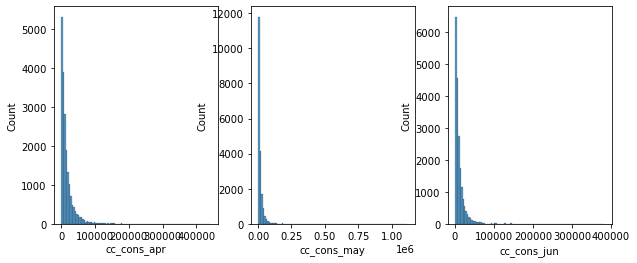

In [19]:
#histplot
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(10,4))
sns.histplot(cust.cc_cons_apr,bins=100, ax=ax[0])
sns.histplot(cust.cc_cons_may,bins=100,ax=ax[1])
sns.histplot(cust.cc_cons_jun,bins=100,ax=ax[2])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cc_cons_jun'>

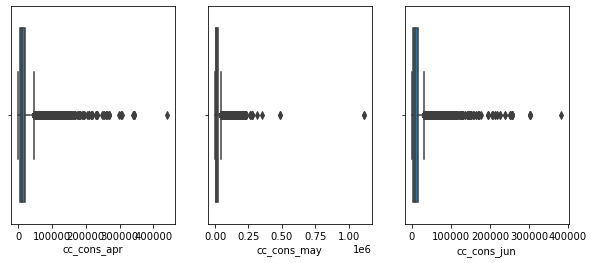

In [20]:
#boxplot
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(10,4))
sns.boxplot(cust.cc_cons_apr,ax=ax[0])
sns.boxplot(cust.cc_cons_may,ax=ax[1])
sns.boxplot(cust.cc_cons_jun,ax=ax[2])

In [21]:
#The following code divides data into attributes and labels:
#Preparing Data For Training
X = cust.iloc[:, 0:4].values
y = cust.iloc[:, 4].values

#The following code divides data into training and testing sets:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Training the Algorithm
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

#Evaluating the Algorithm
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 15306.3745104
Mean Squared Error: 662857533.3438362
Root Mean Squared Error: 25746.019757310765


In [ ]:
#seprating variable based on null Target variable  
Customer_0=Customer[Customer.cc_cons.isna()==0]    #it's use for traing & testing purpose
Customer_1=Customer[Customer.cc_cons.isna()==1]    #we want to predict (null)target variable after Customer_0 training & testing based on accuracy 

In [ ]:
Customer_0=Customer_0.dropna() #droping null values
#OR-----------------------------------------------------------

#missing value treatment:
#def missing_treatment(x):
#    x=x.fillna(x.median())
#    return x
#applying user defined function--------------------------------
#Customer_0=NewCustomer_0.apply(lambda x : missing_treatment(x))

In [ ]:
Customer_0.columns[Customer_0.dtypes=='object']

In [ ]:
#Customer_0.loan_enq.value_counts()                                                                    #Y-14995
#Customer_0.account_type.value_counts()                                              #current-12722   #saving-2273
#Customer_0.gender.value_counts()                                                    #M-12941         #F-2054
#Customer_0.Income.value_counts()                                     #MEDIUM-9610   #LOW-4186        #HIGH-1199

In [ ]:
#object data types
Customer_0['loan_enq'].replace(['Y',np.nan],[1,0],inplace=True)
#Customer_0.loan_enq

#Customer_0.columns[Customer_0.dtypes=='object']
#----->Index(['loan_enq', 'account_type', 'gender', 'Income'], dtype='object')
encoding=Customer_0[Customer_0.columns[Customer_0.dtypes==object]]
#object data types
#Customer_0.columns[Customer_0.dtypes=='object']
#----->Index(['loan_enq', 'account_type', 'gender', 'Income'], dtype='object')
encoding=Customer_0[Customer_0.columns[Customer_0.dtypes==object]]





#One Hot Encoding using Sci-kit learn Library: (method-2)
from sklearn.preprocessing import OneHotEncoder
#Create an instance of One-hot-encoder
enc=OneHotEncoder()
one_hot=pd.DataFrame(enc.fit_transform(encoding[['account_type', 'gender', 'Income']]).toarray(),columns=['account_type_current','account_type_saving', 'gender_F','gender_M','Income_HIGH','Income_LOW','Income_MEDIUM'])

#checking columns name with number of count to assign name for columns 
#Customer_0.Income.value_counts()
#Onehot.Income_MEDIUM.value_counts()

#Merging
New_Customer_0=Customer_0.join(one_hot)
#droping columns which is encoded using one-hot
New_Customer_0=New_Customer_0[New_Customer_0.columns.drop(New_Customer_0.columns[New_Customer_0.dtypes==object])]
#New_Customer_0.dtypes

In [ ]:
New_Customer_0=New_Customer_0.dropna() #droping nullvalue which is created by one-hot encoding

In [ ]:
New_Customer_0.personal_loan_closed.astype('int')
New_Customer_0[['vehicle_loan_closed','vehicle_loan_active','personal_loan_closed','personal_loan_active']]

In [ ]:
#Preparing Data For Training
X=Customer_0[Customer_0.columns[Customer_0.columns!='cc_cons']]
Y=Customer_0.cc_cons

#The following code divides data into training and testing sets:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
#checking shape
X_train.shape
#y_train.shape
X_test.shape
#y_test.shape

In [ ]:
#Customer_0.shape
#Customer_0.dtypes
#Customer_0.info()
#Customer_0.describe()
#Customer_0.duplicated().sum()
#Customer_0.isnull().sum()





#outlier treatment
#def outlier_capping(x):
#    x=x.clip(upper=x.quntile(0.99),lower=x.quantile(0.01))
#    return x
#applying user defined function--------------------------------------------
#Customer_0=NewCustomer_0.apply(lambda x : outlier_capping(x))

In [ ]:

plt.hist(Customer_0.cc_cons,bins=5)

plt.show()
sns.displot(Customer_0, x="cc_cons",kde=True)